In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
from pandas.plotting import table

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.orm import create_session

In [6]:
# engine = create_engine("sqlite:///../Resources/hawaii.sqlite")
# data_path = "hawaii.sqlite"
engine = create_engine("sqlite:///hawaii.sqlite")
# engine = create_engine("sqlite:///{data_path}")
conn = engine.connect()

In [7]:
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)
# session = create_session(bind = engine)
Base.classes.keys()

['measurement', 'station']

In [59]:
data = pd.read_sql_query("SELECT * FROM measurement", conn)
data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
import time

# Exploratory Climate Analysis

C:\Users\hanys\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Inches')

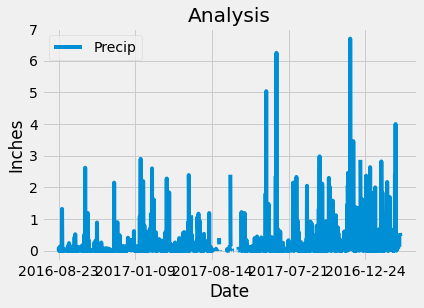

In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= previous_year).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['Date', 'Precip'])
df.set_index(df['Date'], inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.title("Analysis")
plt.xlabel("Date")
plt.ylabel("Inches")


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,Precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# The lowest temperature recorded, highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).\
    filter(Measurements.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [44]:
# Choose the station with the highest number of temperature observations.

session.query(func.max(Measurements.tobs)).first()

session.query(Measurements.station, func.max(Measurements.tobs)).\
    order_by(func.count(Measurements.station)).all()




[('USC00519397', 87.0)]

C:\Users\hanys\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Temp')

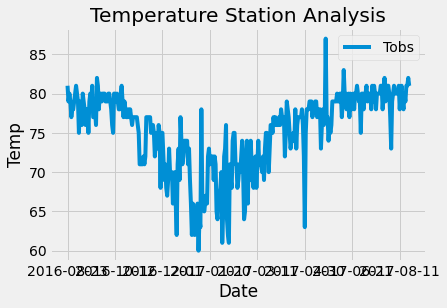

In [61]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurements.date, Measurements.tobs).filter(Measurements.date >= previous_year).filter(Measurements.station == 'USC00519397').all()


df = pd.DataFrame(results, columns=['Date', 'Tobs'])
df.set_index(df['Date'], inplace=True)


#plot the results as a histogram
df.plot()
plt.title("Temperature Station Analysis")
plt.xlabel("Date")
plt.ylabel("Temp")